In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [2]:
df = pd.read_csv("C:/datasets/Reviews.csv")

In [3]:
df=df.head(500)


<AxesSubplot:title={'center':'Count of Review by Stars'}>

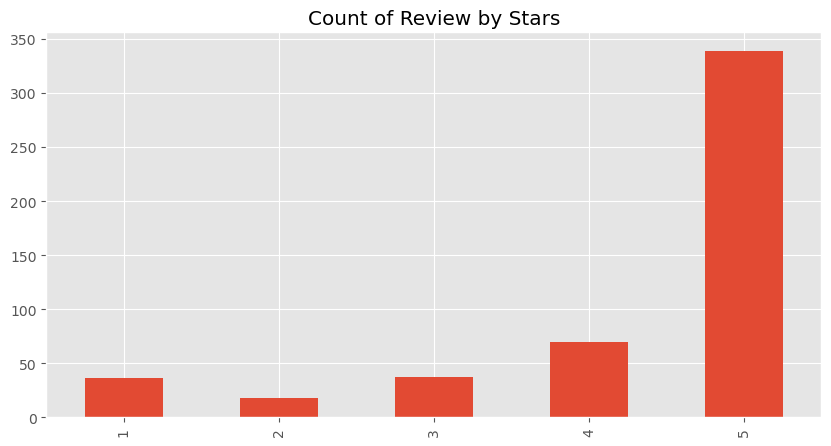

In [4]:
df['Score'].value_counts().sort_index().plot(kind="bar", title='Count of Review by Stars',figsize=(10,5))


In [5]:
example = df['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [6]:
nltk.download('punkt')
# nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
tokens=nltk.word_tokenize(example)
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [8]:
tokens[:10]
# 

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [9]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
nltk.pos_tag(tokens)

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [11]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [13]:
sia.polarity_scores("I am so sad")

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [14]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [15]:
res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [16]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [17]:
pd.DataFrame(res).T


,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [18]:
vaders= pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders= vaders.merge(df,how='left')

In [19]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


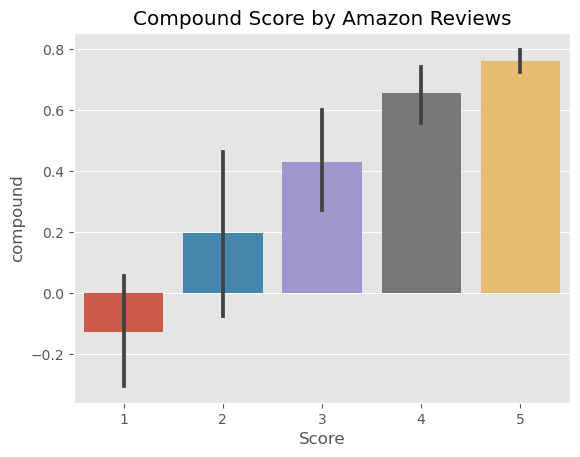

In [20]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compound Score by Amazon Reviews')
plt.show()

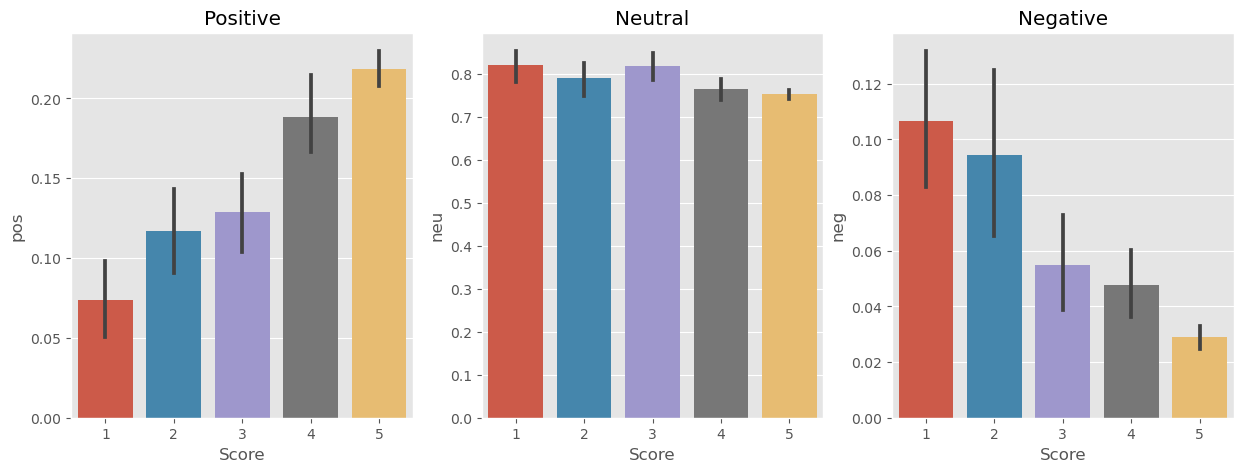

In [21]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x= 'Score' , y='pos',ax=axs[0])
sns.barplot(data=vaders, x= 'Score' , y='neu',ax=axs[1])
sns.barplot(data=vaders, x= 'Score' , y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [22]:
!pip install transformers



In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)


In [25]:
tokenizer(example,return_tensors='pt')

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [30]:
encoded_text= tokenizer(example,return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.02068747, 'roberta_pos': 0.0029573706}


In [28]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [29]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [31]:
def polarity_scores_roberta(example):
    encoded_text= tokenizer(example,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [33]:
res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename={}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"]=value
        roberta_result = polarity_scores_roberta(text)
        both={**vader_result,**roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')
    
    

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [34]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')


In [35]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [36]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

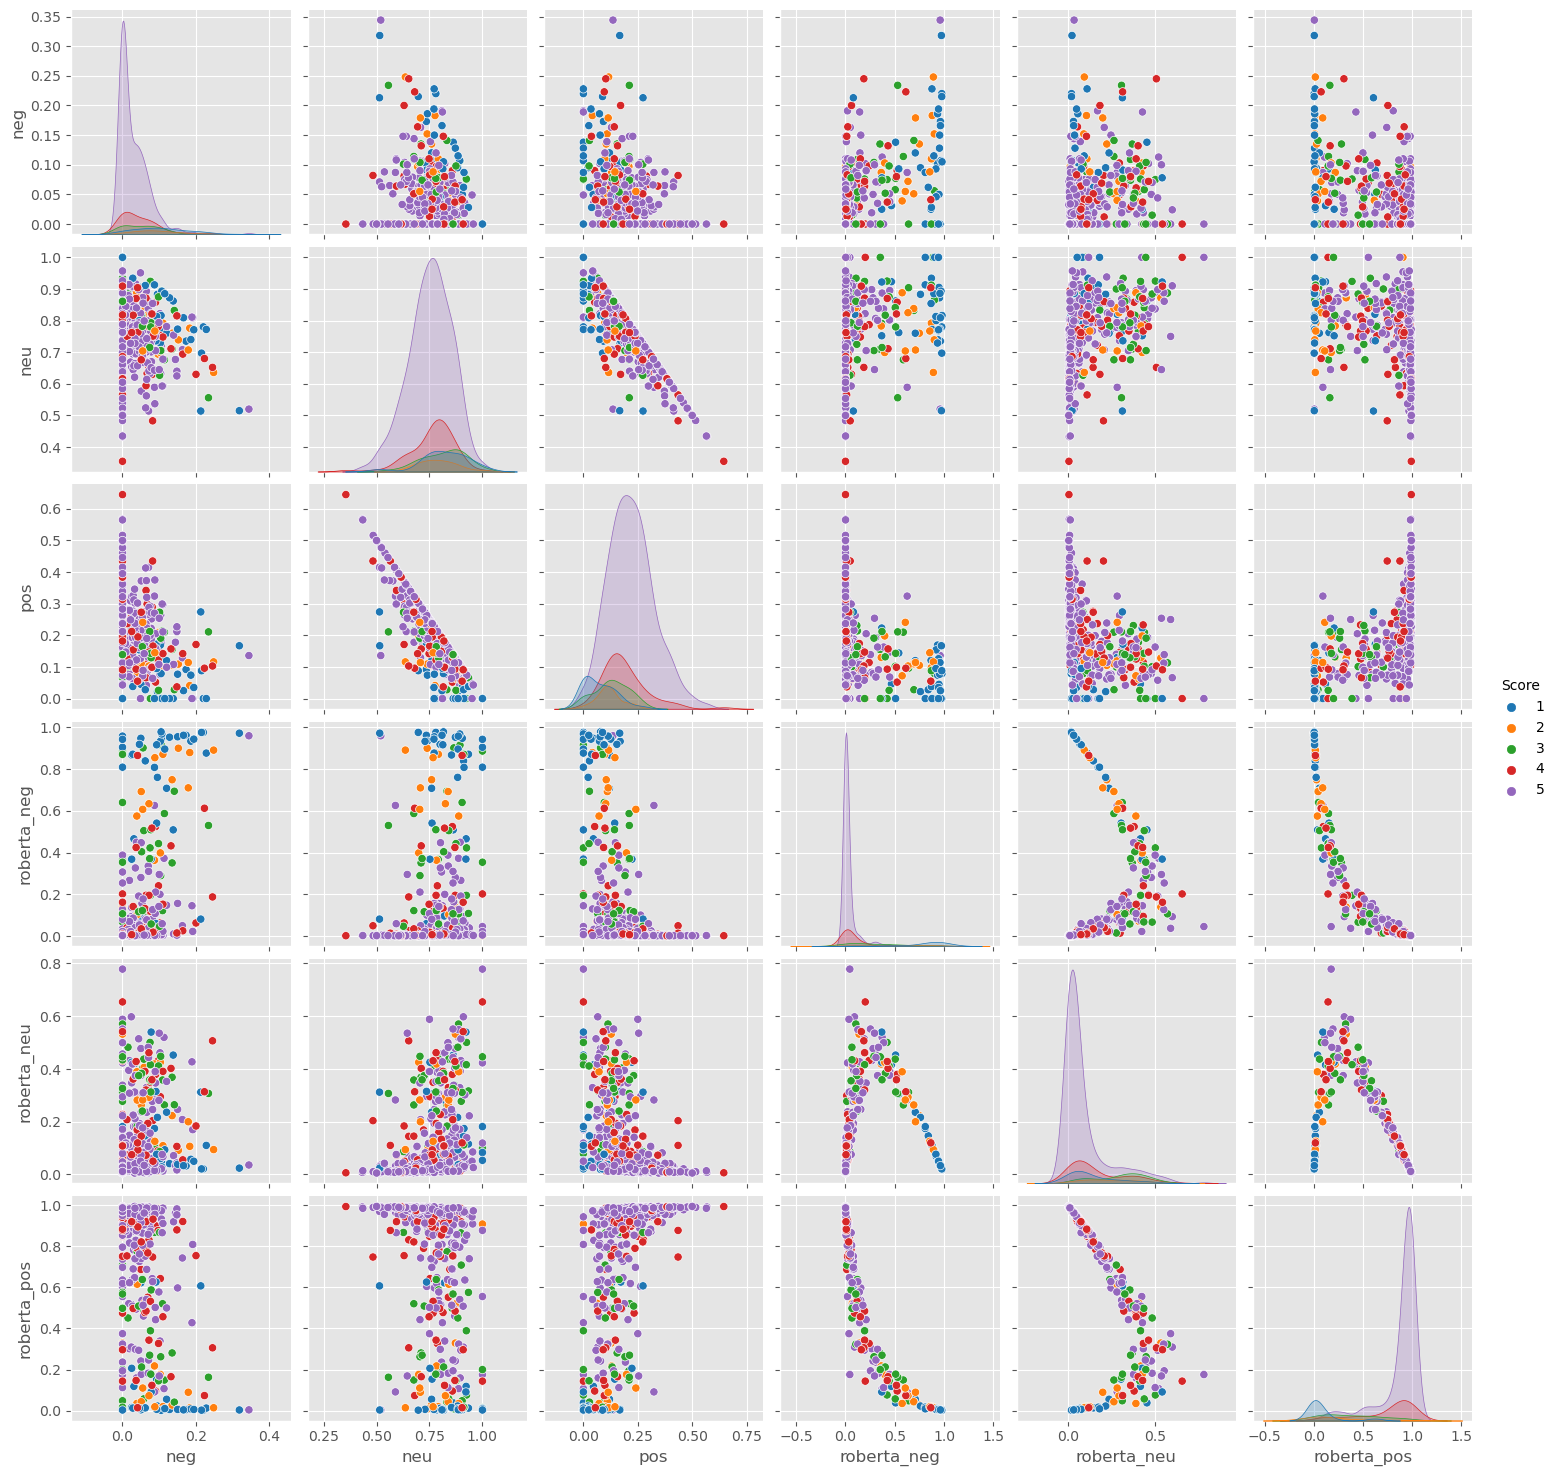

In [37]:
sns.pairplot(data=results_df,vars=['neg', 'neu', 'pos','roberta_neg', 'roberta_neu',
       'roberta_pos'],hue='Score',palette='tab10')
plt.show()

In [38]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
252,255,0.091,0.736,0.172,0.4118,0.059614,0.314749,0.625637,B0048IC328,A1W867A8DSHFHC,no name,1,3,1,1339804800,Don't Waste Your Money,"I felt energized within five minutes, but it l..."
206,209,0.050,0.820,0.130,0.8913,0.095904,0.282240,0.621856,B0028C44Z0,A3BJ9NS09YGQT5,"Atl Chris ""Atl Chris""",0,3,1,1314489600,These just don't do it for me as breath mints,"To me, these are nothing like the regular Alto..."
322,325,0.213,0.514,0.274,0.3185,0.081018,0.311803,0.607180,B000JEHAHS,A2CU16YU1KEOUY,"Hurricane Ridge ""Chris""",5,19,1,1168300800,Never Arrived,So we cancelled the order. It was cancelled w...
163,165,0.025,0.752,0.223,0.8957,0.368308,0.425197,0.206495,B000ITVLE2,ARTBQH9WOZTIV,"Billy Wilson ""amzrview""",0,4,1,1269216000,Tasteless but low calorie,Seriously this product was as tasteless as the...
73,74,0.093,0.762,0.144,0.9665,0.541301,0.304906,0.153794,B0059WXJKM,A25VFHVGI4CFTP,Diana Robinson,0,1,1,1335744000,Warning! WARNING! -ALCOHOL SUGARS!,Buyer Beware Please! This sweetener is not for...
12,13,0.031,0.923,0.046,0.2960,0.466125,0.415259,0.118616,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
214,217,0.078,0.922,0.000,-0.2960,0.368826,0.539683,0.091491,B002TDK0VK,A3GRP8QRFGDH8T,Technically Proficient,1,4,1,1296086400,Price cannot be correct,"Hey, the description says 360 grams - that is ..."
152,154,0.120,0.760,0.120,0.2502,0.708369,0.235633,0.055998,B002HQAXUW,A17ESTP5T7T1PH,Bumbeda1,1,1,1,1324944000,Rip off Price,These singles sell for $2.50 - $3.36 at the st...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
211,214,0.095,0.883,0.022,-0.9726,0.760798,0.216119,0.023083,B0009XLVGA,A1NHQNQ3TVXTZF,"Desert Girl ""chrissylovesherhusband""",3,10,1,1220227200,CHANGED FORMULA MAKES CATS SICK!!!!,"As with canidae, Felidae has also changed thei..."


In [41]:
results_df.query('Score ==1')\
.sort_values('roberta_pos',ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [43]:
results_df.query('Score ==1')\
.sort_values('pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [47]:
results_df.query('Score ==1')\
.sort_values('roberta_neu',ascending=False)['Text'].values[0]


'Hey, the description says 360 grams - that is roughly 13 ounces at under $4.00 per can. No way - that is the approximate price for a 100 gram can.'

In [46]:
results_df.query('Score ==1')\
.sort_values('neu',ascending=False)['Text'].values[0]

"I wouldn't even think of buying this product unless I know the price per unit. How can I compare other items online or in a store?"

In [48]:
results_df.query('Score ==1')\
.sort_values('neg',ascending=False)['Text'].values[0]

'These condiments are overpriced and terrible. The classic is disgustingly sweet. The spiced tastes like a bad spicy marinara sauce from a chain restaurant.'

In [49]:
results_df.query('Score ==1')\
.sort_values('roberta_neg',ascending=False)['Text'].values[0]

'I so wish I would have read this review before purchasing TWO gallons of this oil for my health issues. It reeks like a chemical rubber smell. This smell is coming from the black rubber gasket in the lid. When I called to report the situation to the company, Sabrina told me I would have to pay to send them a sample to have tested by a lab. Unbelievable. Good customer service would indicate that they would pay for the product to be returned and give me a full refund, including shipping. The product is faulty. Period. I will never order anything from this company again and do not recommend it to anyone based on this horrible customer service and lack of responsibility and ownership.'

In [50]:
from transformers import pipeline

In [51]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [54]:
sent_pipeline("its a good thing")

[{'label': 'POSITIVE', 'score': 0.9998509883880615}]

In [55]:
sent_pipeline("not good")

[{'label': 'NEGATIVE', 'score': 0.9997889399528503}]

In [56]:
sent_pipeline("its not a good thing")

[{'label': 'NEGATIVE', 'score': 0.9997954964637756}]

In [57]:
sent_pipeline("u can make it better")

[{'label': 'NEGATIVE', 'score': 0.9361626505851746}]

In [58]:
sent_pipeline("I love it")

[{'label': 'POSITIVE', 'score': 0.9998799562454224}]